In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_id = test['PassengerId']

# Create a parameter for family size.
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Drop unnecessary columns.
test = test.drop(['SibSp', 'Parch', 'Name','PassengerId','Ticket','Cabin'], axis=1)
titanic = titanic.drop(['SibSp', 'Parch', 'Name','PassengerId','Ticket','Cabin'], axis=1)

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


# EDA

In [3]:
titanic.describe(include='all')

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
count,891.000000,891.000000,891,714.000000,891.000000,889,891.000000
unique,NaN,NaN,2,NaN,NaN,3,NaN
top,NaN,NaN,male,NaN,NaN,S,NaN
freq,NaN,NaN,577,NaN,NaN,644,NaN
mean,0.383838,2.308642,NaN,29.699118,32.204208,NaN,1.904602
std,0.486592,0.836071,NaN,14.526497,49.693429,NaN,1.613459
min,0.000000,1.000000,NaN,0.420000,0.000000,NaN,1.000000
25%,0.000000,2.000000,NaN,20.125000,7.910400,NaN,1.000000
50%,0.000000,3.000000,NaN,28.000000,14.454200,NaN,1.000000
75%,1.000000,3.000000,NaN,38.000000,31.000000,NaN,2.000000


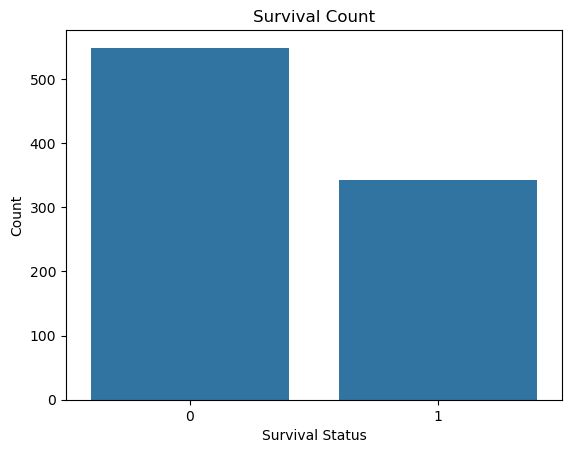

In [4]:
# Distribution of Survived
sns.countplot(x='Survived', data=titanic)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()

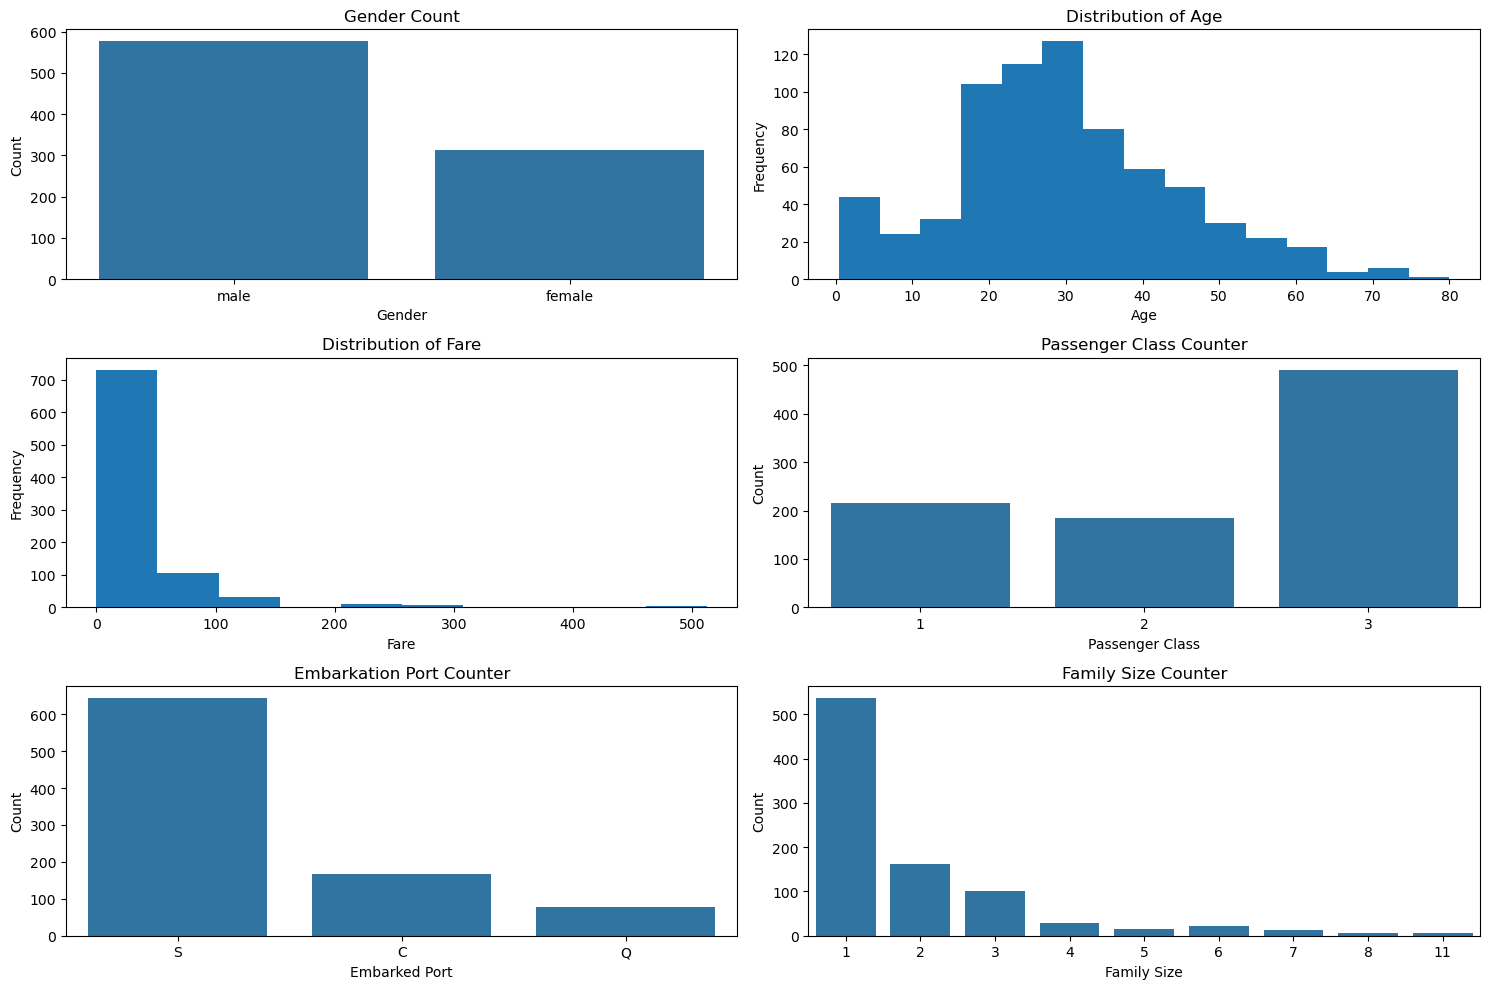

In [5]:
plt.figure(figsize=(15, 10))
#######################################################
# Plot 1: Distribution of Gender
plt.subplot(3, 2, 1)

# Distribution of Survived
sns.countplot(x='Sex', data=titanic)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Count')

# Plot 2: Distribution of Age 
plt.subplot(3, 2, 2)
plt.hist(titanic['Age'], bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Plot 3: Distribution of Fare 
plt.subplot(3, 2, 3)
plt.hist(titanic['Fare'], bins=10)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')

#######################################################
# Plot 4: Distribution of Passenger Class
plt.subplot(3, 2, 4)
sns.countplot(x='Pclass', data=titanic)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Counter')


# Plot 5: Distribution of Embarkation Port
plt.subplot(3, 2, 5)
sns.countplot(x='Embarked', data=titanic)
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.title('Embarkation Port Counter')

# Plot 6: Distribution of Family Size
plt.subplot(3, 2, 6)
sns.countplot(x='FamilySize', data=titanic)
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Family Size Counter')
#######################################################



plt.tight_layout()
plt.show()

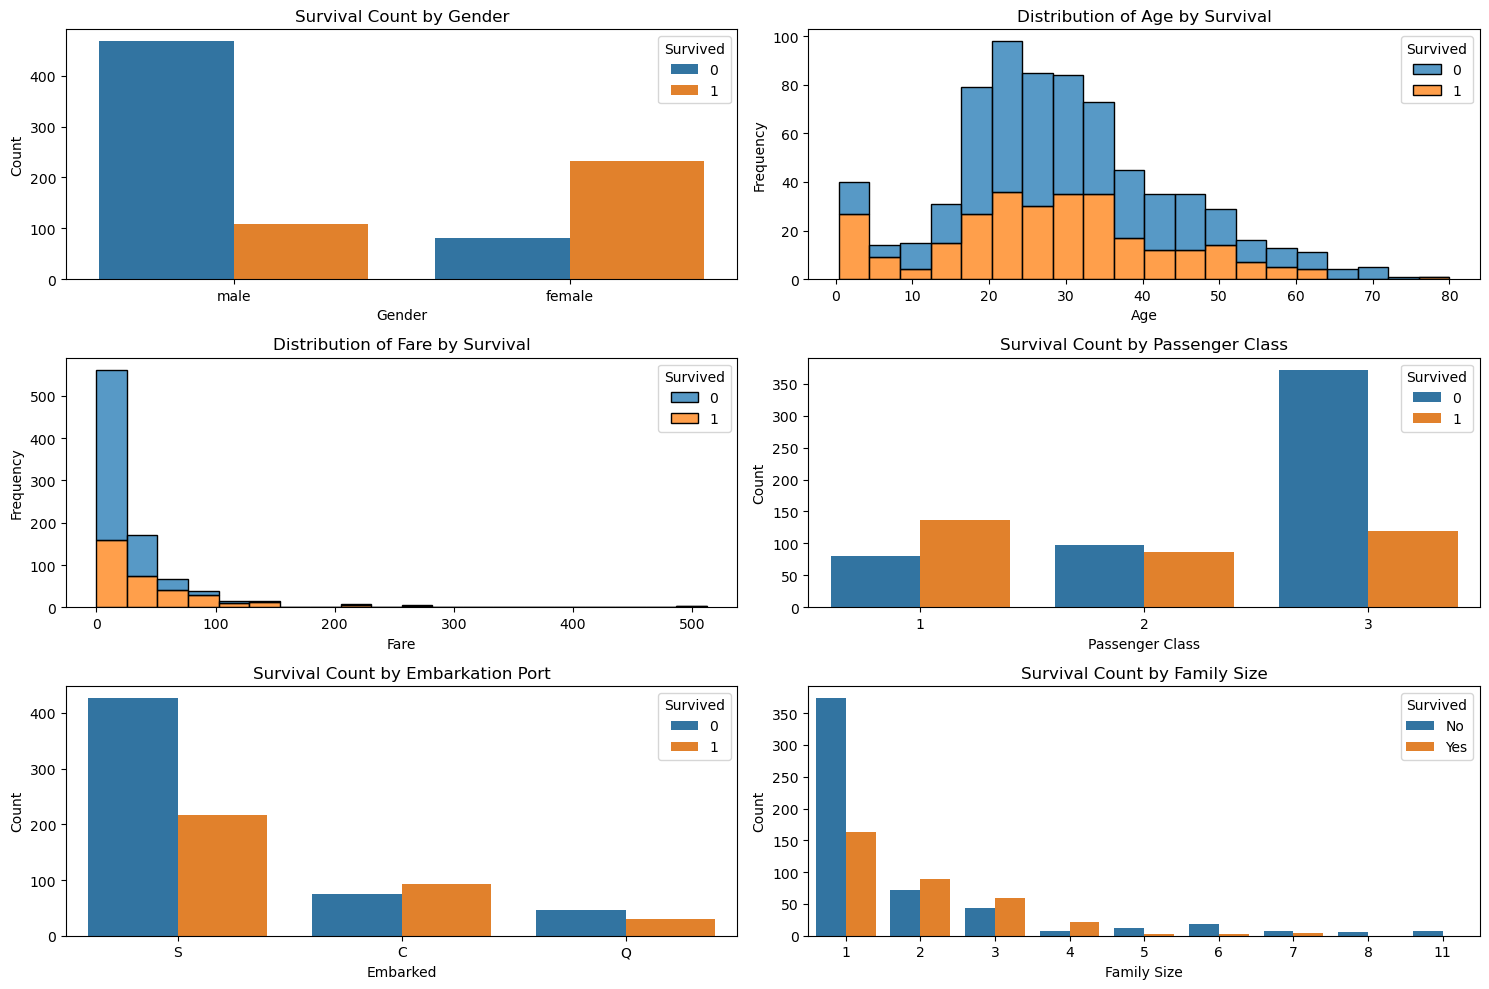

In [6]:
plt.figure(figsize=(15, 10))
#######################################################
# Plot 1: Survival Count by Gender
plt.subplot(3, 2, 1)
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Survival Count by Gender')

# Plot 2: Distribution of Age by Survival
plt.subplot(3, 2, 2)
sns.histplot(x=titanic['Age'], hue=titanic['Survived'], bins=20, multiple="stack")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Survival')

# Plot 3: Distribution of Fare by Survival
plt.subplot(3, 2, 3)
sns.histplot(x=titanic['Fare'], hue=titanic['Survived'], bins=20, multiple="stack")
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare by Survival')
#######################################################
# Plot 4: Survival Count by Passenger Class
plt.subplot(3, 2, 4)
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')

# Plot 5: Survival Count by Embarkation Port
plt.subplot(3, 2, 5)
sns.countplot(data=titanic, x='Embarked', hue='Survived')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival Count by Embarkation Port')

# Plot 6: Survival Count by Family Size
plt.subplot(3, 2, 6)
sns.countplot(data=titanic, x='FamilySize', hue='Survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Survival Count by Family Size')
#######################################################

# Common Legend
plt.legend(title='Survived', labels=['No', 'Yes'], bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

In [7]:
# Divide ages into categories and calculate survival rate
age_categories = pd.cut(titanic['Age'], bins=[0, 18, 30, 50, 100], labels=['0-17', '18-29', '30-49', '50+'])
age_survival = titanic.groupby(age_categories)['Survived'].mean() * 100

# Divide fares into categories and calculate survival rate
fare_categories = pd.cut(titanic['Fare'], bins=[0, 50, 100, 200, 1000], labels=['0-49', '50-99', '100-199', '200+'])
fare_survival = titanic.groupby(fare_categories)['Survived'].mean() * 100

# Create tables
age_table = pd.DataFrame({'Survival Rate (%)': age_survival})
fare_table = pd.DataFrame({'Survival Rate (%)': fare_survival})

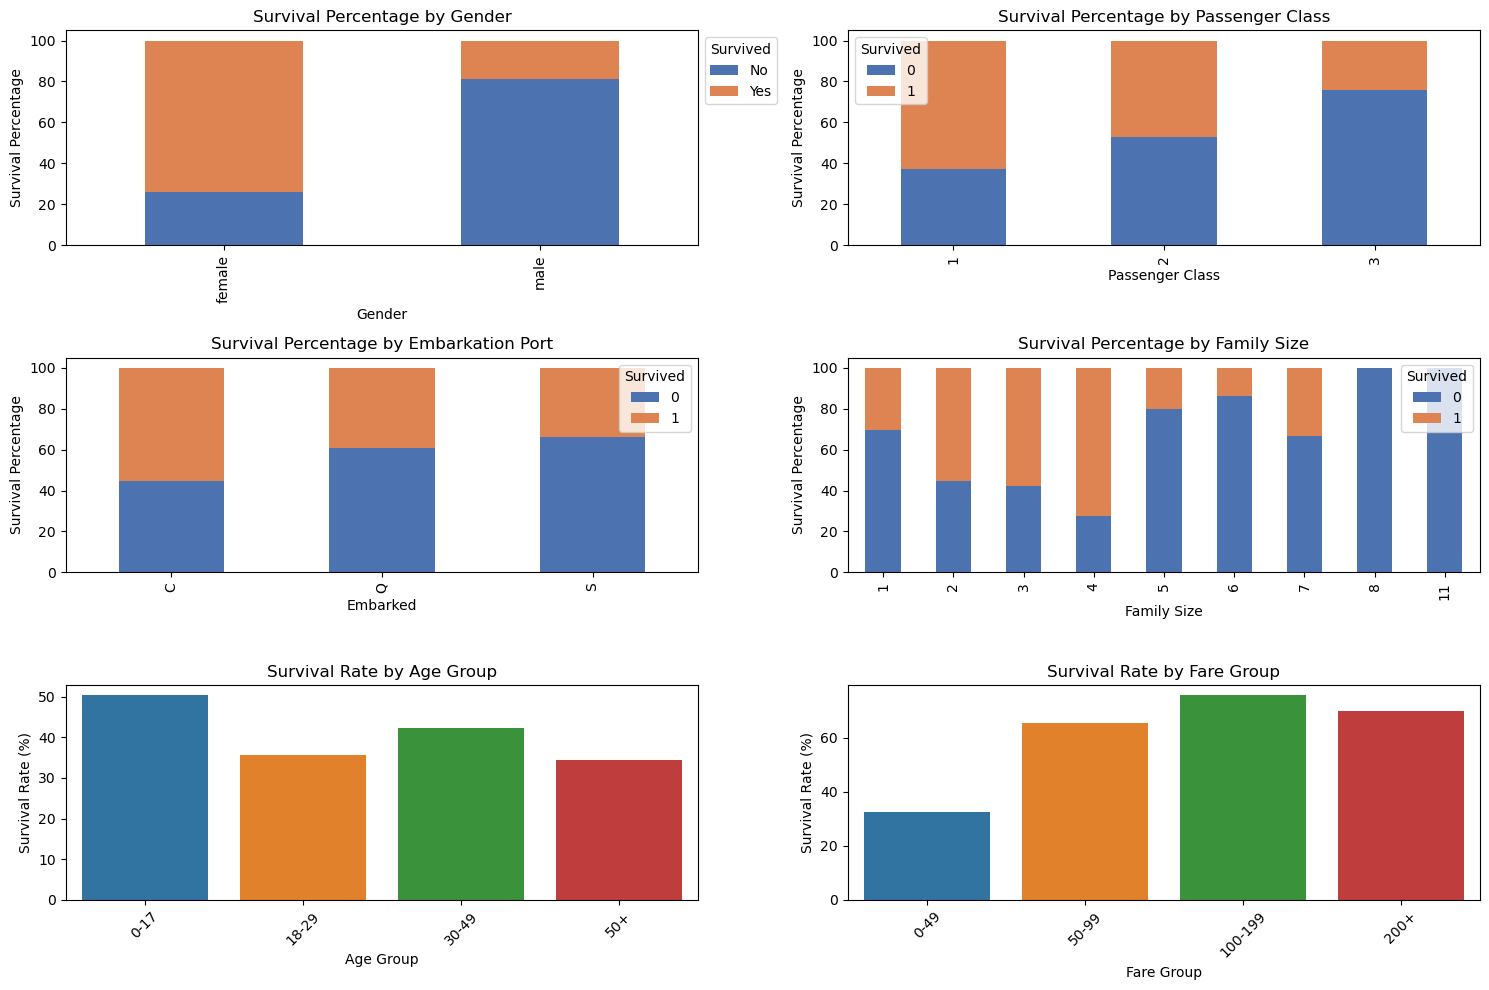

In [8]:
plt.figure(figsize=(15, 10))

# Define the color
orange_color = sns.color_palette('deep')

# Plot 1: Survival Percentage by Gender
plt.subplot(3, 2, 1)
gender_survival_percentage = titanic.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
gender_survival_percentage = gender_survival_percentage.div(gender_survival_percentage.sum(axis=1), axis=0) * 100
gender_survival_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), color=orange_color)
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Gender')
plt.legend(title='Survived', labels=['No', 'Yes'], bbox_to_anchor=(1, 1))

# Plot 2: Survival Percentage by Passenger Class
plt.subplot(3, 2, 2)
class_survival_percentage = titanic.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
class_survival_percentage = class_survival_percentage.div(class_survival_percentage.sum(axis=1), axis=0) * 100
class_survival_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), color=orange_color)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Passenger Class')
############################################################################################
# Plot 3: Survival Percentage by Embarkation Port
plt.subplot(3, 2, 3)
embarked_survival_percentage = titanic.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
embarked_survival_percentage = embarked_survival_percentage.div(embarked_survival_percentage.sum(axis=1), axis=0) * 100
embarked_survival_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), color=orange_color)
plt.xlabel('Embarked')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Embarkation Port')

# Plot 4: Survival Percentage by Family Size
plt.subplot(3, 2, 4)
family_size_survival_percentage = titanic.groupby(['FamilySize', 'Survived']).size().unstack(fill_value=0)
family_size_survival_percentage = family_size_survival_percentage.div(family_size_survival_percentage.sum(axis=1), axis=0) * 100
family_size_survival_percentage.plot(kind='bar', stacked=True, ax=plt.gca(), color=orange_color)
plt.xlabel('Family Size')
plt.ylabel('Survival Percentage')
plt.title('Survival Percentage by Family Size')
##############################################################################################
# Plot 5: Survival Rate by Age Group
plt.subplot(3, 2, 5)
sns.barplot(x=age_table.index, y='Survival Rate (%)', hue=age_table.index, data=age_table, dodge=False)
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)

# Plot 6: Survival Rate by Fare Group
plt.subplot(3, 2, 6)
sns.barplot(x=fare_table.index, y='Survival Rate (%)', hue=fare_table.index, data=fare_table, dodge=False)
plt.xlabel('Fare Group')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Fare Group')
plt.xticks(rotation=45)






plt.tight_layout()
plt.show()



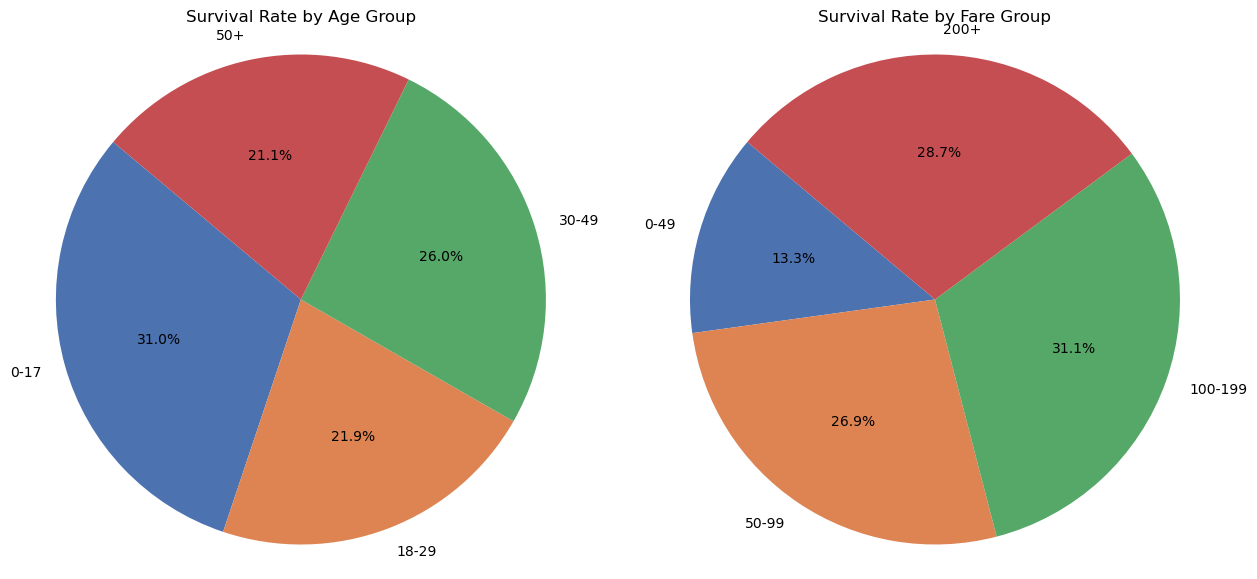

In [9]:
plt.figure(figsize=(15, 7))  # Adjusted figsize

orange_color = sns.color_palette('deep')

# Plot 5: Survival Rate by Age Group
plt.subplot(1, 2, 1)
labels = age_table.index
sizes = age_table['Survival Rate (%)']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=orange_color)
plt.title('Survival Rate by Age Group')
plt.axis('equal')

# Calculate survival rate by fare group
# fare_group_survival_rate = fare_table['Survival Rate (%)']

# Plot 6: Survival Rate by Fare Group
plt.subplot(1, 2, 2)
labels = fare_table.index
sizes = fare_table['Survival Rate (%)']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=orange_color)
plt.title('Survival Rate by Fare Group')
plt.axis('equal')

# plt.tight_layout()
plt.show()

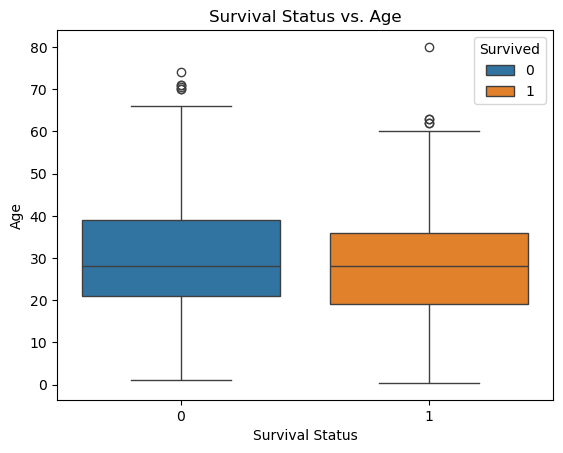

In [10]:
sns.boxplot(x=titanic['Survived'], y=titanic['Age'], hue=titanic['Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Age')
plt.title('Survival Status vs. Age')

plt.show()

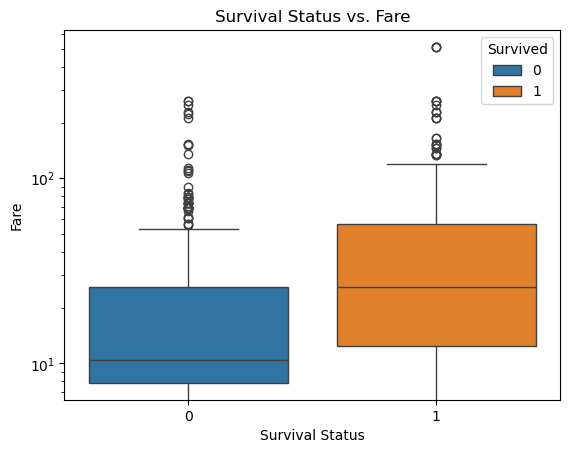

In [11]:
sns.boxplot(x=titanic['Survived'], y=titanic['Fare'], hue=titanic['Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.yscale('log')

plt.title('Survival Status vs. Fare')
plt.show()

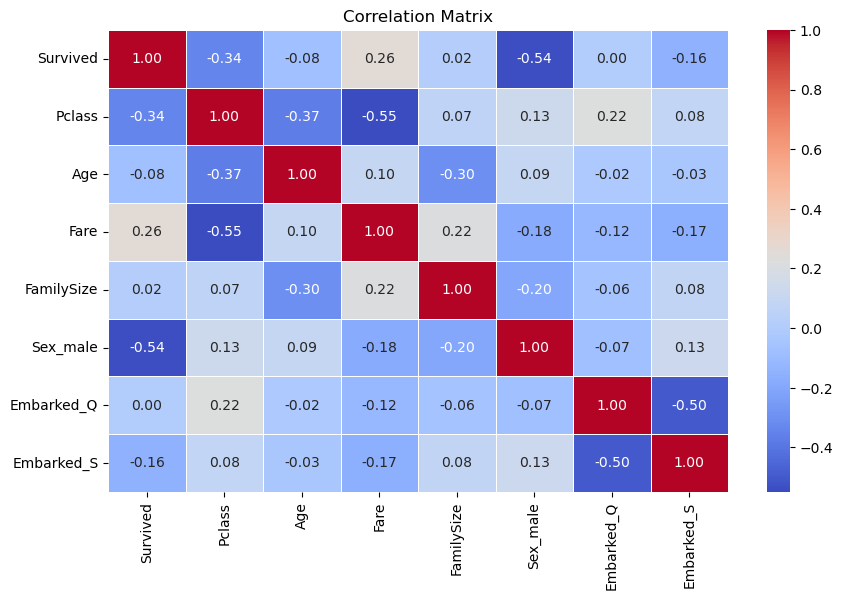

In [12]:
# Drop non-numeric columns and encode categorical columns
titanic_numeric = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)

# Correlation Analysis
plt.figure(figsize=(10, 6))
correlation_matrix = titanic_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\nisan\Desktop\project\env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


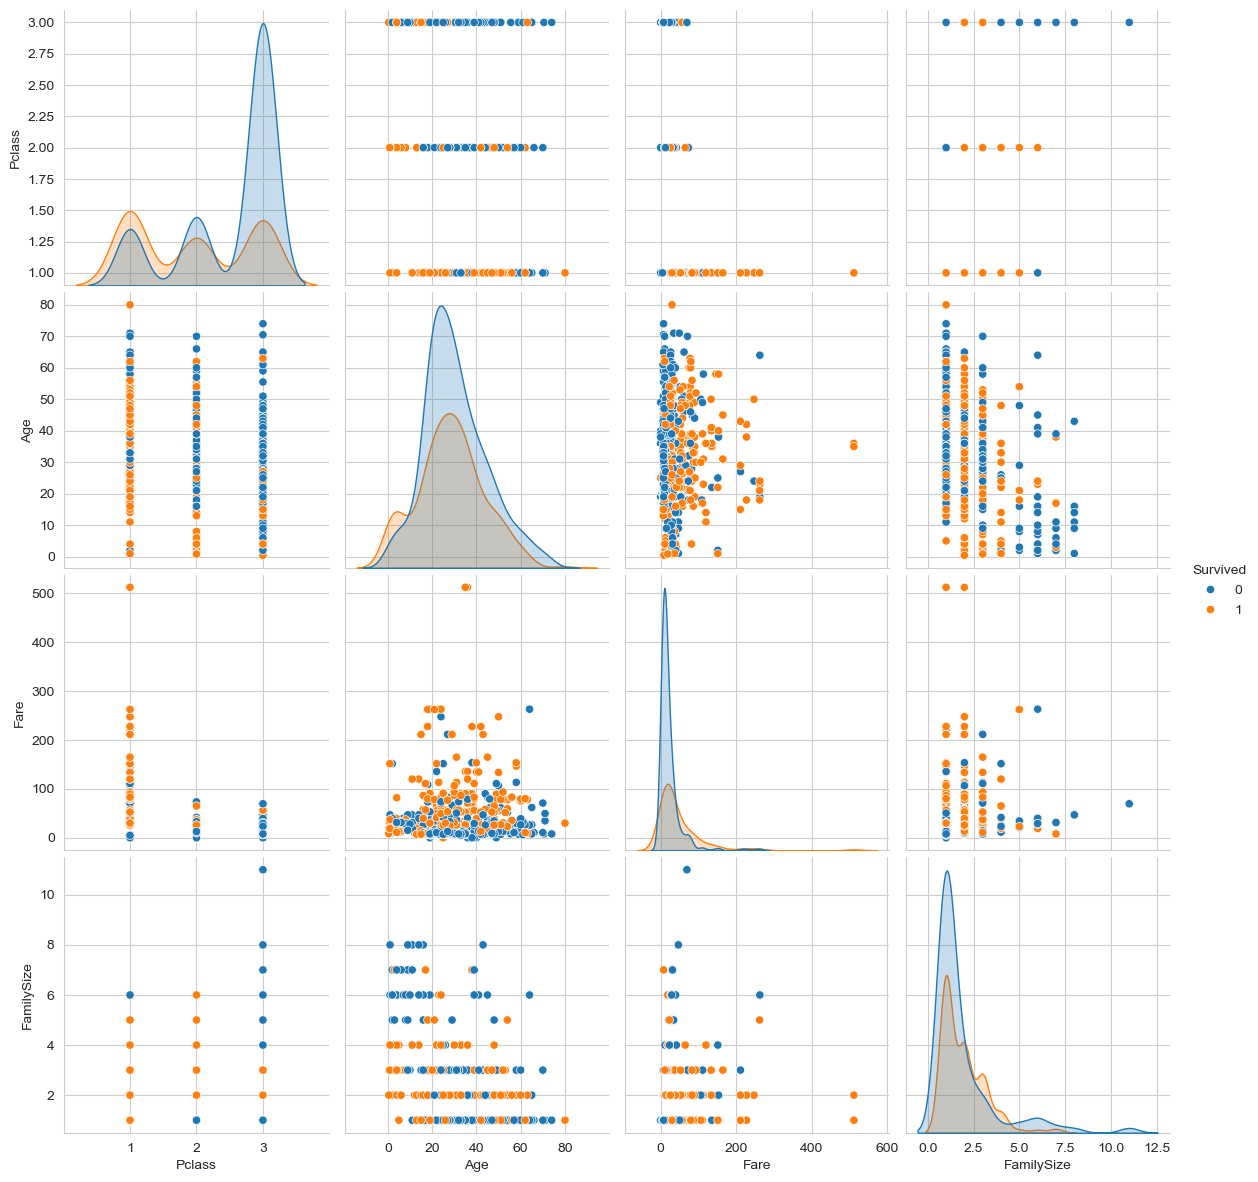

In [13]:
sns.set_style("whitegrid");
sns.pairplot(titanic, hue="Survived", height=3);
plt.show()

### Fare (more than 50 and less than 50 for better fit)

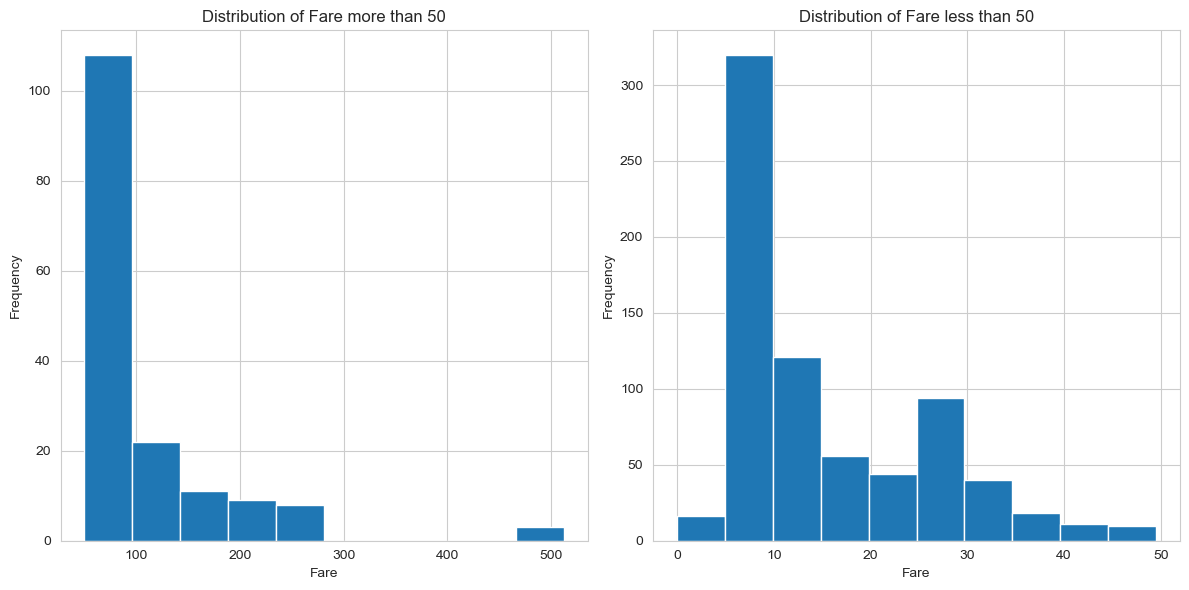

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(titanic[titanic['Fare']>=50]['Fare'], bins=10)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare more than 50')

plt.subplot(1, 2, 2)

plt.hist(titanic[titanic['Fare']<50]['Fare'], bins=10)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare less than 50')


plt.tight_layout()
plt.show()

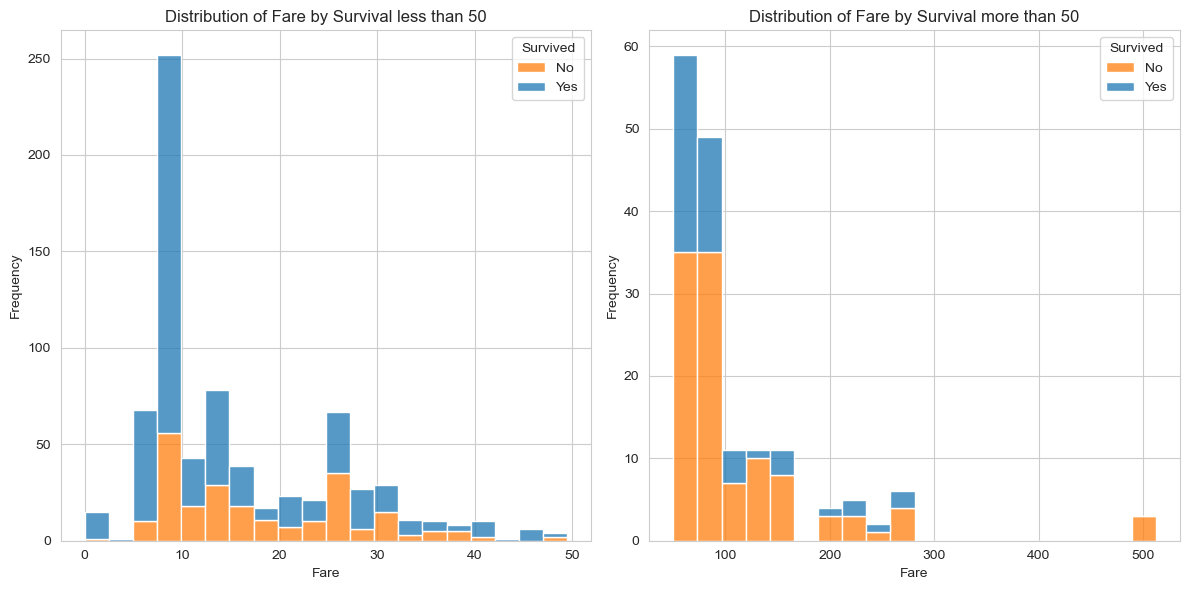

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot( x=titanic[titanic['Fare']<50]['Fare'], hue=titanic['Survived'], bins=20, multiple="stack")
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare by Survival less than 50')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.subplot(1, 2, 2)
sns.histplot( x=titanic[titanic['Fare']>=50]['Fare'], hue=titanic['Survived'], bins=20, multiple="stack")
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare by Survival more than 50')
plt.legend(title='Survived', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()

In [16]:
#Accepts a DataFrame and returns a graph displaying NaN values.
def nan_values(df):
    ax = plt.axes()
    sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)
    plt.title('Missing Values', fontsize=12)
    plt.xlabel('PassengerId', fontsize = 10) 
    plt.ylabel('Columns', fontsize = 10)
    plt.show()

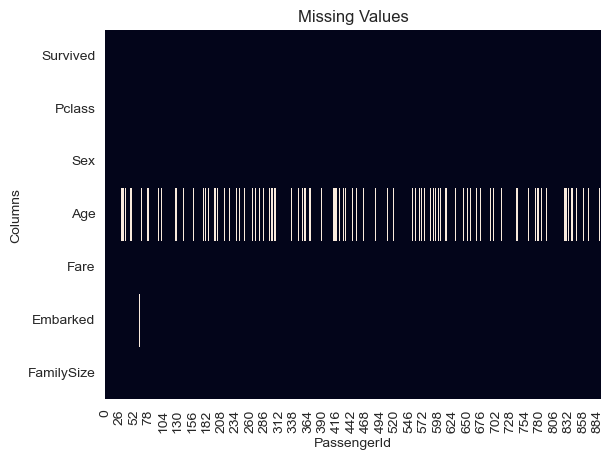

In [17]:
nan_values(titanic)

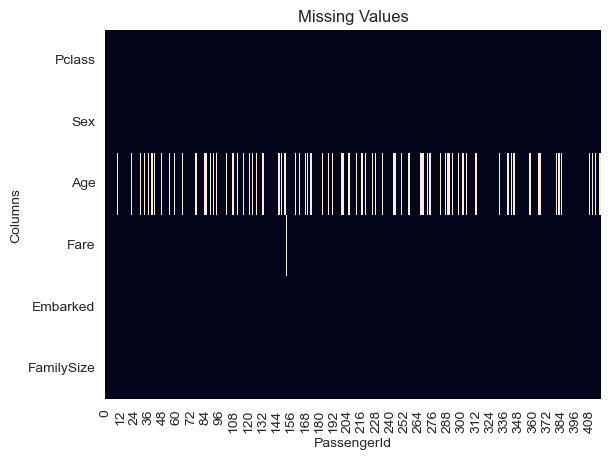

In [18]:
nan_values(test)

In [19]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,NaN,23.4500,S,4
889,1,1,male,26.0,30.0000,C,1


In [20]:
def prepar(pandas_obj):
    #pandas_obj.drop(columns=['PassengerId', 'Name','Cabin','SibSp','Ticket'], inplace=True)
    pandas_obj['Age'].fillna(30, inplace=True)
    pandas_obj['Embarked'].fillna('S', inplace=True)
    pandas_obj['Fare'].fillna(15, inplace=True)
    pandas_obj['Embarked'] = pandas_obj['Embarked'].map({'S': 0, 'Q': 1,'C':2,'N':3 })
    pandas_obj['Sex'] = pandas_obj['Sex'].map({'male': 0, 'female': 1})
    return pandas_obj
titanic =  prepar(titanic)
test = prepar(test)

In [21]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,2
1,1,1,1,38.0,71.2833,2,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,1


In [22]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,34.5,7.8292,1,1
1,3,1,47.0,7.0000,0,2
2,2,0,62.0,9.6875,1,1
3,3,0,27.0,8.6625,0,1
4,3,1,22.0,12.2875,0,3


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [24]:
df =titanic

In [25]:
# Split the data into train and test sets
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
clf = LogisticRegression(random_state=0,penalty=None)
clf.fit(X_train,y_train)
clf.intercept_,clf.coef_

(array([1.85214254]),
 array([[-9.68465694e-01,  2.74597422e+00, -3.19142231e-02,
          2.47022520e-03,  2.31625415e-01, -2.32919840e-01]]))

In [27]:
y_pred = clf.predict(X_train)

accuracy_score(y_train, y_pred) 

0.8019662921348315

In [28]:
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred) 

0.8044692737430168

In [29]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[90 15]
 [20 54]]


In [30]:
clf.fit(X,y)


LogisticRegression(penalty=None, random_state=0)

In [31]:
sub = clf.predict(test)

In [32]:
ans =pd.DataFrame({'PassengerId':test_id.values,'Survived':sub})

In [33]:
ans.to_csv("ans.csv",index=False)

0.77

In [34]:
# Initialize models
logistic_regression = LogisticRegression(C=0.1)
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2)
random_forest = RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200)
svm = SVC(C=1, gamma='scale', kernel='rbf')
gradient_boosting = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200)

# Train models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=200)

In [35]:

# Initialize lists to store evaluation metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Evaluate models
for model in [logistic_regression, decision_tree, random_forest, svm, gradient_boosting]:
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))

# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores
})

print("Model Comparison:")
print(model_comparison)

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.815642   0.805970  0.729730  0.765957  0.802960
1        Decision Tree  0.837989   0.835821  0.756757  0.794326  0.825997
2        Random Forest  0.810056   0.822581  0.689189  0.750000  0.792214
3                  SVM  0.659218   0.760000  0.256757  0.383838  0.599807
4    Gradient Boosting  0.837989   0.868852  0.716216  0.785185  0.820013


In [36]:
# LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Define the pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))

# Define hyperparameters grid
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)

Best Hyperparameters: {'logisticregression__C': 0.01}
Accuracy of the Best Model: 0.8044692737430168


In [37]:
# GradientBoostingClassifier
# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Accuracy of the Best Model: 0.7877094972067039


In [38]:
# RandomForestClassifier
# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy of the Best Model: 0.8044692737430168


In [39]:
# DecisionTreeClassifier
# Define hyperparameters grid
param_grid = {
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy of the Best Model: 0.8324022346368715


In [40]:
# Initialize models
logistic_regression = LogisticRegression(C=0.01)
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
svm = SVC()
gradient_boosting = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)

# Train models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [41]:

# Initialize lists to store evaluation metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

# Evaluate models
for model in [logistic_regression, decision_tree, random_forest, svm, gradient_boosting]:
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))

# Create a DataFrame to compare model performance
model_comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'ROC AUC': roc_auc_scores
})

print("Model Comparison:")
print(model_comparison)

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.731844   0.906250  0.391892  0.547170  0.681660
1        Decision Tree  0.798883   0.827586  0.648649  0.727273  0.776705
2        Random Forest  0.804469   0.800000  0.702703  0.748201  0.789447
3                  SVM  0.659218   0.760000  0.256757  0.383838  0.599807
4    Gradient Boosting  0.804469   0.809524  0.689189  0.744526  0.787452


In [42]:
logistic_regression.fit(X,y)
decision_tree.fit(X,y)
random_forest.fit(X,y)
svm.fit(X,y)
gradient_boosting.fit(X,y)

GradientBoostingClassifier(n_estimators=50)

In [43]:
log_reg = logistic_regression.predict(test)
dec_tree = decision_tree.predict(test)
rand_forest = random_forest.predict(test)
svm_pr = svm.predict(test)
grad_boosting = gradient_boosting.predict(test)

In [44]:
log_reg =pd.DataFrame({'PassengerId':test_id.values,'Survived':log_reg})
dec_tree =pd.DataFrame({'PassengerId':test_id.values,'Survived':dec_tree})
rand_forest =pd.DataFrame({'PassengerId':test_id.values,'Survived':rand_forest})
svm_pr =pd.DataFrame({'PassengerId':test_id.values,'Survived':svm_pr})
grad_boosting =pd.DataFrame({'PassengerId':test_id.values,'Survived':grad_boosting})


In [45]:
log_reg.to_csv("log_reg.csv",index=False)
dec_tree.to_csv("dec_tree.csv",index=False)
rand_forest.to_csv("rand_forest.csv",index=False)
svm_pr.to_csv("svm_pr.csv",index=False)
grad_boosting.to_csv("grad_boosting.csv",index=False)

log_reg:0.72
dec_tree:0.77
rand_forest:0.78
svm_pr:0.66
grad_boosting:0.78468

<font color='orange'>
RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)      </font>
<font color='red'>                       
<br><b>NEED TO TRAE
    </font>

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',
    random_state=42  # Random seed for reproducibility
)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)


C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Accuracy of the Best Model: 0.8044692737430168


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=200,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds in cross-validation
    scoring='accuracy',
    random_state=42  # Random seed for reproducibility
)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)


C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 108 is smaller than n_iter=200. Running 108 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5}
Accuracy of the Best Model: 0.8044692737430168


In [50]:
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=50)


In [51]:
random_forest.fit(X,y)
rand_forest = random_forest.predict(test)
rand_forest =pd.DataFrame({'PassengerId':test_id.values,'Survived':rand_forest})
rand_forest.to_csv("rand_forest.csv",index=False)


random_forest : 0.78

In [54]:
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200)
random_forest.fit(X,y)
rand_forest = random_forest.predict(test)
rand_forest =pd.DataFrame({'PassengerId':test_id.values,'Survived':rand_forest})
rand_forest.to_csv("rand_forest.csv",index=False)

random_forest : 0.78708 bast
# <font color='orange'>random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200) </font>
# <font color='red'><br><b>0.78708 bast </font>

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Random Forest hyperparameters grid
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting hyperparameters grid
gb_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.5],
    'max_depth': [3, 4, 5, 6]
}

# Initialize RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit RandomizedSearchCV for Random Forest
rf_random_search.fit(X_train, y_train)

# Initialize RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=gb_param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit RandomizedSearchCV for Gradient Boosting
gb_random_search.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest
rf_best_params = rf_random_search.best_params_

# Get the best hyperparameters for Gradient Boosting
gb_best_params = gb_random_search.best_params_

# Evaluate the best models
rf_best_model = rf_random_search.best_estimator_
gb_best_model = gb_random_search.best_estimator_

rf_y_pred = rf_best_model.predict(X_test)
gb_y_pred = gb_best_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
gb_accuracy = accuracy_score(y_test, gb_y_pred)

print("Random Forest Best Hyperparameters:", rf_best_params)
print("Random Forest Accuracy:", rf_accuracy)

print("Gradient Boosting Best Hyperparameters:", gb_best_params)
print("Gradient Boosting Accuracy:", gb_accuracy)


Random Forest Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5}
Random Forest Accuracy: 0.8044692737430168
Gradient Boosting Best Hyperparameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Gradient Boosting Accuracy: 0.8044692737430168


In [56]:
gradient_boosting = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100)

In [57]:
from sklearn.ensemble import VotingClassifier

# Create a VotingClassifier ensemble
ensemble_model = VotingClassifier(
    estimators=[
        ('random_forest', random_forest),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='hard'  # Use 'hard' voting for binary classification
)

# Train the ensemble model
ensemble_model.fit(X, y)

# Make predictions with the ensemble model
ensemble_y_pred = ensemble_model.predict(test)
ensemble_y_pre =pd.DataFrame({'PassengerId':test_id.values,'Survived':ensemble_y_pred})
ensemble_y_pre.to_csv("ensemble_y_pred.csv",index=False)


In [58]:
from sklearn.ensemble import VotingClassifier

# Initialize models
logistic_regression = LogisticRegression(C=0.01)
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200)
svm = SVC()
gradient_boosting = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic_regression', logistic_regression),
        ('decision_tree', decision_tree),
        ('random_forest', random_forest),
        ('svm', svm),
        ('gradient_boosting', gradient_boosting)
    ],
    voting='hard'  # Use 'hard' voting for binary classification
)




In [59]:
# Train the ensemble model
ensemble_model.fit(X, y)

# Make predictions with the ensemble model
ensemble_y_pred = ensemble_model.predict(test)
ensemble_y_pre =pd.DataFrame({'PassengerId':test_id.values,'Survived':ensemble_y_pred})
ensemble_y_pre.to_csv("ensemble_y_pred.csv",index=False)

In [62]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters grid for the ensemble model
param_grid = {
    'voting': ['hard', 'soft'],  # Voting strategy
    'weights': [[1, 1, 1, 1, 1], [2, 1, 1, 1, 1], [1, 2, 1, 1, 1], [1, 1, 2, 1, 1], [1, 1, 1, 2, 1]],  # Voting weights
}

# Initialize RandomizedSearchCV for the ensemble model
ensemble_random_search = RandomizedSearchCV(
    estimator=ensemble_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=7,
    scoring='accuracy',
    random_state=42
)

# Fit RandomizedSearchCV for the ensemble model
ensemble_random_search.fit(X_train, y_train)

# Get the best hyperparameters for the ensemble model
best_params = ensemble_random_search.best_params_

# Evaluate the best ensemble model
best_model = ensemble_random_search.best_estimator_
ensemble_y_pred = best_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_y_pred)

print("Best Ensemble Model Hyperparameters:", best_params)
print("Ensemble Model Accuracy:", ensemble_accuracy)


C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 10 is smaller than n_iter=50. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_call

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn

C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\nisan\Desktop\project\env\lib\site-packages\sklearn

Best Ensemble Model Hyperparameters: {'weights': [1, 1, 1, 1, 1], 'voting': 'hard'}
Ensemble Model Accuracy: 0.8100558659217877


In [61]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Initialize base models
logistic_regression = LogisticRegression(C=0.01)
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)
random_forest = RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200)
svm = SVC()
gradient_boosting = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)

# Create the ensemble model with best hyperparameters
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', logistic_regression),
        ('dt', decision_tree),
        ('rf', random_forest),
        ('svm', svm),
        ('gb', gradient_boosting)
    ],
    voting='hard',  # Use 'hard' voting strategy
    weights=[1, 1, 2, 1, 1]  # Use the optimized voting weights
)

# Train the ensemble model
ensemble_model.fit(X, y)

# Make predictions with the ensemble model
ensemble_y_pred = ensemble_model.predict(test)
ensemble_y_pre =pd.DataFrame({'PassengerId':test_id.values,'Survived':ensemble_y_pred})
ensemble_y_pre.to_csv("ensemble_y_pred.csv",index=False)


ensemble_model : 0.7799